## 1.1
### 2

O algoritmo que implementa o método de Newton é

In [18]:
# x: Valor inicial
# f: Função f(x)
# f_linha: Derivada da função f(x)
# n: Número de interações que serão feitas
function newton(x,f,f_linha,n)
    # Método de newton sendo aplicado. A cada iteração, temos uma aproximação melhor.
    # Itera de 1 até n
    for i in 1:n
        x = x - f(x)/f_linha(x)
    end
    # Retorna a aproximação desejada
    return x
end

newton (generic function with 1 method)

A função que nos interessa é $f(x) = \ln(3x)$ quando $x=1$. Tornando ambos os lados como o expoente da função $e$, temos
\begin{align*}
e^{f(1)} = 3
\end{align*}
pois x = 1. Isolando o 3
\begin{align*}
e^{f(1)} - 3 = 0
\end{align*}
Dessa forma, procuramos a raiz da função
\begin{align*}
g(y)=e^y-3 
\end{align*}
onde $y = f(1) = \ln(3)$. Utilizando o resultado acima, podemos utilizar o método de Newton para aproximar $\ln(3)$. Dessa forma, precisamos da primeira derivada, ou seja
$$
g'(y) = e^y
$$
e também do chute inicial. Para o chute inicial, sabemos que a raiz está entre $g(0)=-2$ e $g(2)\approx4.3890$, sendo assim, tomando a média desses dois resultados, podemos supor um chute inicial $y=1.1945$. O algoritmo será

In [3]:
# Função f
g(y) = exp(y) - 3

# Derivada da função g
g_linha(y) = exp(y)

# Número de passos
n = 20

# Chute inical
y = 1.1945

# Imprime o resultado
print(newton(y,g,g_linha,n))

1.0986122886681098

## 1.2

In [2]:
using LinearAlgebra

# pontos: São os pontos (x_i,f(x_i)) que serão utilizados na regressão
# grau: Grau do polinômio aproximador
function regressao(pontos, grau)
    # Número de equações geradas, ou linhas na matrix de Vandermonde
    n_eq =  length(pontos)
    # Número de colunas na matrix de Vandermonde
    n_col = grau + 1
    
    # Constroi a matriz de Vandermonde V e a matriz coluna y com os valores f(x_i)
    V = zeros(n_eq, n_col)
    y = zeros(n_eq)
    
    # Constroi a matriz de Vandermonde linha a linha. Assim como a matriz y.
    for i in 1:n_eq
        # Pontos é uma lista de tuplas [(i,f(i)),...,(j,f(j))]
        y[i] = pontos[i][2]
        for j in 1:n_col
            # Construção da matriz V elemento a elemento de uma linha
            V[i,j] = pontos[i][1]^(j-1)
        end
    end
    # Calcula os coeficientes do polinômio aproximador
    return V\y
end

regressao (generic function with 1 method)

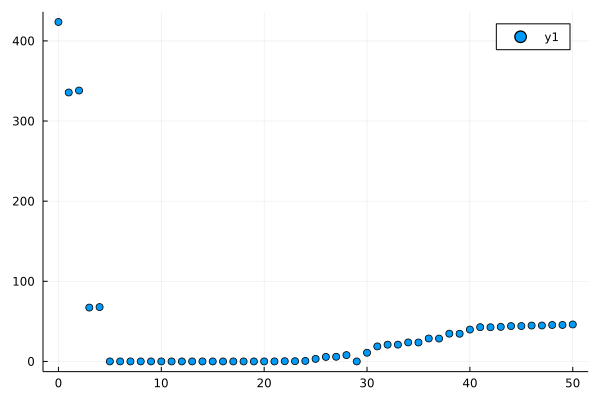

In [4]:
using Plots
using Distributions

# Polinômio de grau 5 
f(x) = x^(5)-x^(4)-x^(3)+x^(2)+x+1

# Pontos sendo gerados aleatoriamente. 
#= Primeiro geramos os valores do domínio i,...,j de forma aleatoria e uniforme, ou seja, evitando repetir valores.
Depois ordenamos estes valores em forma crescente para facilitar no momento do plot. 
A seguir, geramos uma lista com os pontos (i,f(i)),...,(j,f(j)), estes pontos são tuplas.
=#
xs = rand(Uniform(-5, 5), 30)
xs = sort(xs)
pontos = map((x) -> (x, f(x)), xs)

# Função que gera o polinômio aproximador e retorna o valor g(x) para um x dado
# coefs: Lista dos coeficientes computados
# x: Valor do contradomínio
function g(coefs, x)    
    y = 0
    # Computa y = c_0 + c_1x + c_2x^2 + ... + c_(n-1)x^(n-1)
    for i in 1:length(coefs)
        y = y + coefs[i]*x^(i-1)
    end
    return y
end

# Erros que serão calculados.
Y = []
# Número de pontos
n_pontos = length(pontos)
# Grau limite que será computado
grau_lim = 50

# Computa o erro para cada polinômio de grau i.
for i in 0:grau_lim
    # Supomos que o erro é 0 no início
    erro = 0
    # Computa os coeficientes do polinîmio aproximador
    coefs = regressao(pontos,i)
    # Soma todos os erros, para cada ponto dado. Assim temos uma "visão" de todos os erros.
    for j in 1:n_pontos
        # Para cada x_j na lista de pontos...
        x = pontos[j][1]
        # ... Somamos f(x_j) a soma dos demais erros calculados nos outros valores do domínio.
        erro = erro + abs(g(coefs,x) - f(x))
    end
    # Computamos a média desses erros, para evitar que o conjunto da imagem seja muito grande devido as somas.
    erro = erro / n_pontos
    
    # Colocamos o erro na lista dos erros calculados
    push!(Y,erro)
end

# Graus que serão calculados
X = 0:grau_lim
scatter(X,Y)

Podemos notar que quando o grau é menor que 5, o erro é grande, como é de se esperar, porque utlizamos um polinômio de grau 5 para gerar os pontos. Dessa forma, a partir do grau 5, a regressão acerta bem até certo ponto, visto que queremos acertar pontos gerados por um polinômio de grau 5 através de um polinômio com grau maior que 5.

Quando o polinômio tem um grau bem maior que 29, ou seja, um grau maior que polinômio interpolador para estes 30 pontos, o erro começa a aumentar novamente. Isso ocorre pois o sistema começa a ter bastante liberdade, já que há mais variáveis para serem determinadas do que equações para restringir do sistema. Sendo assim, um pensamento trivial seria "chutar" valores para essas novas variáveis a serem determinadas, pois teríamos infinitas soluções para o sistema. Como em muitas vezes um chute pode ser errado, o polinômio aproximador também pode errar quando há liberdade demais, ou em outras palavras, quando as variáveis a serem determinadas precisam seguir pouquíssimas equações para serem determinadas.

## 1.3
A matriz $V$ e $y$ abaixo foram construídas através das esquações
$$
F_i - F_j = k_{ij}
$$
onde $F_i$ representa o número de alunos que preferem o filme $f_i$ ao invés do filme $f_j$. $F_j$ representa o número de alunos que preferem o filme $f_j$ ao invés do filme $f_i$. A parte esquerda dessas equações são representas pela matriz $V$, enquanto a parte direita pela matriz $y$. A matriz $p$ que queremos definir que representa a preferência dos alunos em relação a todos os filme é a matriz coluna
$$
\begin{bmatrix}
\text{TS}\\
\text{R}\\
\text{DVPF}\\
\text{CVA}\\
\text{OI}\\
\text{D}\\
\text{BB}\\
\text{HP}\\
\text{S}\\   
\end{bmatrix}
$$
onde cada sigla representa as inicias de cada nome de filme. O resultado você pode ver abaixo

In [6]:
V = [
    1 -1 0 0 0 0 0 0 0; 
    0 0 1 -1 0 0 0 0 0;
    0 0 0 0 1 -1 0 0 0;
    0 0 0 0 0 0 1 -1 0;
    0 0 0 0 0 -1 0 0 1;
    0 -1 0 0 0 0 0 1 0;
    1 0 -1 0 0 0 0 0 0;
    0 0 0 0 1 0 0 -1 0;
    0 0 0 1 0 -1 0 0 0;
    0 0 1 0 0 -1 0 0 0;
    0 -1 0 0 0 0 0 0 1;
    0 0 0 0 1 0 -1 0 0;
    1 0 0 0 0 0 -1 0 0;
    0 0 0 -1 1 0 0 0 0;
    ]
y = [11;3;7;2;9;7;5;5;2;2;11;5;3;7]

p = V\y
print(p)

LoadError: invalid redefinition of constant p

O resultado mostra que o melhor filme é Shrek, pois a variável $S$ possui o maior valor.

## 1.4

Como há muitos pontos, podemos tentar resolver o problema utilizando uma ideia mais geométrica. Para isso, os pesos foram colocados em uma lista, e os dias, em outra. A ideia é criar uma função discreta e desenhá-la, onde os pesos serão o contradomínio e os dias, o domínio da função. Os pesos são números reais, o que é bom para implementar, o problema está nos dias, que estão em formato de data. Para ultrapassar este obstáculo é possível tomar a primeiro dia da pesagem como o tempo $t=0$, enquanto os dias posteriores seriam uma sequência dos números naturais subsequentes 1,2,3,...,83. Os dias onde não houve pesagem, não são contados, então entre uma pesagem a outra pode haver um espaço no gráfico. Por exemplo, do dia 4 ao dia 10 não houve pesagem alguma, sendo assim há 6 dias onde não conhecemos a pesagem do professor. O resultado pode ser visto abaixo. 

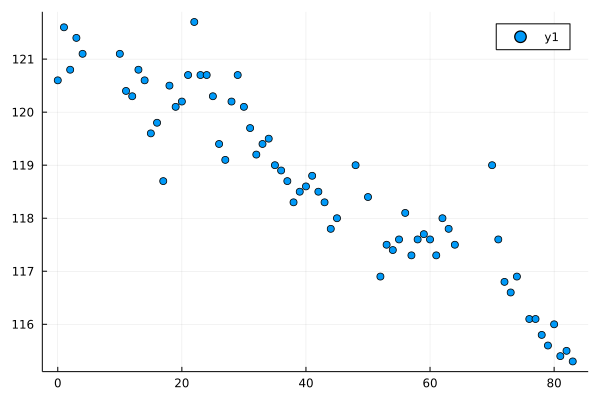

In [13]:
# Lista de pesos
pesos = [120.6, 121.6, 120.8, 121.4, 121.1, 121.1, 
    120.4, 120.3, 120.8, 120.6, 119.6, 119.8, 118.7, 
    120.5, 120.1, 120.2, 120.7, 121.7, 120.7, 120.7, 120.3, 
    119.4, 119.1, 120.2, 120.7, 120.1, 119.7, 119.2, 119.4, 
    119.5, 119.0, 118.9, 118.7, 118.3, 118.5, 118.6, 118.8, 
    118.5, 118.3, 117.8, 118.0, 119.0, 118.4, 116.9, 117.5, 
    117.4, 117.6, 118.1, 117.3, 117.6, 117.7, 117.6, 117.3, 
    118.0, 117.8, 117.5, 119.0, 117.6, 116.8, 116.6, 116.9, 
    116.1, 116.1, 115.8, 115.6, 116.0, 115.4, 115.5, 115.3
]

# Lista de dias
dias = [0, 1, 2, 3, 4, 10, 11, 12, 13, 14, 15, 16, 17, 18, 
    19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 
    33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 48,
    50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 
    70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83
]

# Função  utilizada na função map.
# Rebece dois elementos x e y de duas listas xs e ys respectivamente e retorna a tupla (x,y)
function gera_pontos(x,y)
    return (x,y)
end
# Transforma a lista de pesos e dias em uma lista de pontos
pontos = map(gera_pontos, dias, pesos)

# Plota os pontos gerados
scatter(pontos)



Através do gráfico podemos notar que há uma certa linearidade. Alguns pontos estão bem próximos uns dos outros, alguns poucos, então mais distantes, mas mesmo assim, seguem uma linearidade, como se o peso decaísse de forma linear ao decorrer do tempo. A partir disso, podemos utilizar regressão, e tentar aproximar estes pontos através de uma função afim. A seguir, utilizaríamos o método de Newton para descobrir o tempo $t_0$ tal que $p(t_0) = 110$. 

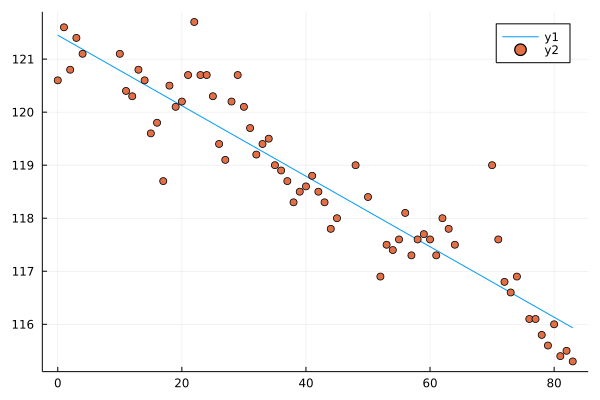

t_0 = 172.26753579630738


In [26]:
# Coeficientes da função afim computados
coefs = regressao(pontos,1)

# Função afim aproximadora gerada.
f(t) = coefs[1] + coefs[2]*t

# Derivada da função afim para utilizar no método de Newton.
f_linha(t) = coefs[2]

# Função que será utilizada pelo método de Newton, pois h(t_0) = 0 = f(t_0) - 100 => f(t_0) = 100
h(t) = f(t) - 110

# Derivada da função que será utilizada pelo método de Newton
h_linha(t) = f_linha(t)

# Domínio da função afim aproximadora. 
T = 0:83
# Desenho da função afim e dos pontos no mesmo gráfico para uma visualização geométrica.
plot(f,T)
display(scatter!(pontos))

#  Método de Newton computando t_0
t_0 = newton(83,h,h_linha,50)
println("t_0 = ", t_0)


Com o resultado acima podemos observar que apenas daqui a 89 dias depois da última pesagem o professor talvez tenha um peso igual a 110kg, visto que $t_0 - 83 = 172 - 83 = 89$. Este resultado é muito plausível pois na primeira pesagem, foi medido um peso de 120.6kg, enquanto no última, o peso era de 115.3kg. Fazendo a diferença podemos checar que no período dado o professor perdeu 5.3kg. Agora, fazendo a diferença da última pesagem com o peso de 110kg, ou seja, o peso alvo, percebemos que o professor precisa perder mais 5.3kg. Dessa forma, se a tendência de perca e ganho de massa continuar, podemos chutar que levará mais ou menos 83 dias para que o peso alvo seja alcançado. Contudo, pelo resultado do método de Newton através do polinômio aproximador, encontramos que daqui a mais ou menos 89 dias o professor chegará ao peso de 110kg. Portanto, tanto pelo método de checar a tendência das pesagens como pelo método da regressão, encontramos resultados bem próximos.

## 1.5

A tabela abaixo representa os valores dados

| t (h) | T (°C) |
| :-: | :-: |
| 15 | 34 | 
| 16.5 | 30 | 
| 17.5 | 25 | 

Pela Fórmula de Resfriamento de Newton
$$
T(t) = (T_0-T_f)e^{-kt} + T_f
$$
podemos dizer que $T_0 = 34$, pois foi a primeira medida feita e $T_f=20$, pois o corpo tende a se manter em equilíbrio térmico com o ambiente onde esta. Dessa forma, temos a fórmula
$$
T(t) = 14e^{-kt} + 20
$$
A meta é descobrir a constante k. Para isso, vamos utilizar regressão. Como os coeficientes não são lineares, vamos operar a equação acima para que haja coeficiente lineares. Então
\begin{align*}
T(t) &= 14e^{-kt} + 20\\
T(t) - 20 &= 14e^{-kt}\\
\ln(T(t) - 20) &= \ln(14e^{-kt})\\
\ln(T(t) - 20) &= \ln(14) - kt
\end{align*}
Agora, através dos dados que possuímos, precisamos que a constante $k$ tente respeitar na medida do possível as equações
\begin{align*}
\ln(34 - 20) &= \ln(14) - 0t
\ln(34 - 20) &= \ln(14) - 1.5t
\ln(34 - 20) &= \ln(14) - 2.5t
\end{align*}

In [2]:
V = [1; 1;]
T = [ log(14/10)/1.5; log(14/5)/2.5; ]

println(V)
println(T)

k = V\T

[1, 1]
[0.22431482441414194, 0.4118477668724633]


0.3180812956433026